# Analysis of DNA-MERFISH for CTP11

by Pu Zheng

2022.02.15

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_1\20220307-P_brain_CTP11_from_0303

This data is DNA of uncleared MERFISH RNA:
    \\10.245.74.158\Chromatin_NAS_0\20220303-P_brain_M1_nonclear_adaptor


In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

35996


# 0. fov parameters

In [8]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304',
             'save_folder':r'\\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304_warp',
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':10,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# 1. Process Fov

In [30]:
_overwrite = False

_save_images = True

_fit_spots = True

_warp_images = True

_fov_id = 20

fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False, # whether overwrite
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 20
- Number of field of views: 168
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C54', 'H54C55', 'H55C56', 'H56C57', 'H57C58', 'H58C59', 'H59C60', 'H60C61', 'H61C62', 'H62C63', 'H63C64', 'H64C65', 'H65C66', 'H66U2', 'H67U3', 'H68U4', 'H69U5', 'H70U6', 'H71U7', 

In [31]:
# 2. Process image into candidate spots
fov.parallel = False
fov.combo_ref_id = 0
fov._process_image_to_spots('combo', 
                            _load_common_reference=True, _load_with_multiple=False,
                            _save_images=_save_images,
                            _warp_images=_warp_images, 
                            _fit_spots=_fit_spots,
                            _overwrite_drift=False, _overwrite_image=_overwrite,
                            _overwrite_spot=_overwrite,
                            _verbose=True)

-- folders not selected, allow processing all 19 folders
-- checking combo, region:[ 1  2 67] in 0.109s.
-- checking combo, region:[101 102 165] in 0.078s.
-- checking combo, region:[ 3  4 68] in 0.048s.
-- checking combo, region:[ 5  6 69] in 0.058s.
-- checking combo, region:[ 7  8 70] in 0.047s.
-- checking combo, region:[ 9 10 71] in 0.034s.
-- checking combo, region:[11 12 72] in 0.047s.
-- checking combo, region:[13 14 73] in 0.047s.
-- checking combo, region:[15 16 74] in 0.031s.
-- checking combo, region:[17 18 75] in 0.031s.
-- checking combo, region:[19 20 76] in 0.047s.
-- checking combo, region:[21 22 77] in 0.031s.
-- checking combo, region:[23 24 78] in 0.040s.
-- checking combo, region:[25 26 79] in 0.036s.
-- checking combo, region:[27 28 80] in 0.038s.
-- checking combo, region:[29 30 81] in 0.030s.
-- checking combo, region:[31 32 82] in 0.044s.
-- checking combo, region:[33 34 83] in 0.029s.
+ Start sequential pre-processing for 12 images
++ processed combo ids: [11 

E:\Users\puzheng\anaconda3\lib\site-packages\scipy\optimize\minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


8383 fitted in 284.695s.
-- start fitting spots in channel:561, 9291 seeded with th=500, 9284 fitted in 370.125s.
- writting combo spots into file:\\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304_warp\Conv_zscan_020.hdf5
-- updated spots for id:[11, 12, 72] in 0.188s
+ batch process image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H8C9\Conv_zscan_020.dax for channels:['750', '647', '561']
- loading combo info from file:Conv_zscan_020.hdf5 in 0.341s.
-- ['750', '647', '561'] images are required to process, [] images are loaded from save file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304_warp\Conv_zscan_020.hdf5
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H8C9\Conv_zscan_020.dax
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H8C9\Conv_zscan_020.dax  in 46.057s
-- removing hot pixels for channels:['750', '647', '5

KeyboardInterrupt: 

In [16]:
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _ids = list(_grp['ids'][:])
    _flags = _grp['flags'][:]
    sel_inds = np.where(_flags)[0]
    sel_ims = []
    sel_raw_spots = []
    #
    for _ind in sel_inds:   
        sel_ims.append(_grp['ims'][_ind])
        sel_raw_spots.append(_grp['raw_spots'][_ind])

In [15]:
default_im_size=np.array([50,2048,2048])
default_num_buffer_frames = 0
default_num_empty_frames = 0

class ImageProcesser():
    """Major image processing class for 3D image in DNA-MERFISH,
    including two major parts:
        1. image corrections
        2. spot finding
    """
    def __init__(self, 
                 ImageFilename, 
                 CorrectionFolder=None,
                 ):
        """Initialize class"""
        if isinstance(ImageFilename, str) and os.path.isfile(ImageFilename):
            self.filename = ImageFilename
        elif not isinstance(image, str):
            raise TypeError(f"Wrong input type ({type(ImageFilename)}) for ImageFilename.")
        else:
            raise OSError(f"image file: {ImageFilename} doesn't exist, exit.")
        self.correction_folder = CorrectionFolder
        
    def _load_info(self, 
                   ImSize=default_im_size, 
                   NbufferFrame=default_num_buffer_frames, 
                   NemptyFrame=default_num_empty_frames):
        pass
    
    def _load_image(self, ImSize=None, ):
        pass
        
    def _corr_illumination(self, correction_pf=None, correction_folder=None):
        pass
    def 
    

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:

sel_fov_ids = np.arange(19, 20) # batch1 in franklin

for _fov_id in sel_fov_ids:
    
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    

    
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, 
                                _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 3. Process image into candidate spots
    #fov.unique_ref_id = 0
    #fov._process_image_to_spots('unique', 
    #                            _load_common_reference=True, _load_with_multiple=False,
    #                            _save_images=_save_images, _warp_images=False, _verbose=True)
    # 4. Process DAPI image
    fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 12
- Number of field of views: 168
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C54', 'H54C55', 'H55C56', 'H56C57', 'H57C58', 'H58C59', 'H59C60', 'H60C61', 'H61C62', 'H62C63', 'H63C64', 'H64C65', 'H65C66', 'H66U2', 'H67U3', 'H68U4', 'H69U5', 'H70U6', 'H71U7', 

In [22]:
    fov._load_dapi_image()

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_020.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_020.dax  in 45.859s
-- removing hot pixels for channels:['405'] in 12.828s
-- illumination correction for channels: 405, in 4.157s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 64.031s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304_warp\Conv_zscan_020.hdf5
++ base attributes saved:['dapi_im'] in 9.732s.


array([[[ 4218,  4294,  4253, ...,  2962,  2745,  2729],
        [ 4419,  4280,  4069, ...,  2823,  2773,  2756],
        [ 4437,  4364,  4095, ...,  3169,  2853,  2706],
        ...,
        [13055, 12663, 12271, ..., 11717, 11431, 12096],
        [12399, 12399, 12364, ..., 11371, 11458, 11957],
        [12675, 12668, 12558, ..., 11199, 11445, 12123]],

       [[ 4034,  3955,  3649, ...,  2890,  2715,  2756],
        [ 4031,  3771,  3982, ...,  2820,  2962,  2751],
        [ 4575,  3811,  4160, ...,  2808,  2706,  2431],
        ...,
        [12262, 12287, 11820, ..., 11874, 11510, 11588],
        [12162, 11941, 11981, ..., 11289, 11217, 11957],
        [12594, 12587, 12482, ..., 11694, 11697, 11949]],

       [[ 4221,  4142,  3885, ...,  2790,  2557,  2731],
        [ 3923,  3503,  4025, ...,  2659,  2631,  2526],
        [ 3995,  4041,  3800, ...,  2575,  2678,  2606],
        ...,
        [13055, 12738, 12047, ..., 11556, 11990, 11842],
        [12399, 12856, 11752, ..., 12011, 114

In [ ]:
sel_ids = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,68,69,70,71,72,73,74,75,76,101,102,165])



    for _id in sel_ids:
        _ind = _ids.index(_id)


In [6]:
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _ids = list(_grp['ids'][:])
    _flags = _grp['flags'][:]
    

In [7]:
_flags

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
sel_ids = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,68,69,70,71,72,73,74,75,76,101,102,165])

with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _ids = list(_grp['ids'][:])
    sel_ims = []
    sel_raw_spots = []
    for _id in sel_ids:
        _ind = _ids.index(_id)
        sel_ims.append(_grp['ims'][_ind])
        sel_raw_spots.append(_grp['raw_spots'][_ind])

In [17]:
coord_dict = {
    'coords': [],#np.fliplr(sel_spots[:,1:4]),
    'class_ids': [],#sel_ids,
}

for _i, _spots in enumerate(sel_raw_spots):
    _spots = _spots[_spots[:,0]>0]
    if len(_spots) > 0:
        coord_dict['coords'].extend(list(np.fliplr(_spots[:,1:4])))
        #coord_dict['coords'].extend(list(np.fliplr(_crop.crop_coords(_spots.to_coords()[_sel_inds]))))
        coord_dict['class_ids'].extend(list(np.ones(len(_spots),dtype=np.int32) * _i))
    

<IPython.core.display.Javascript object>


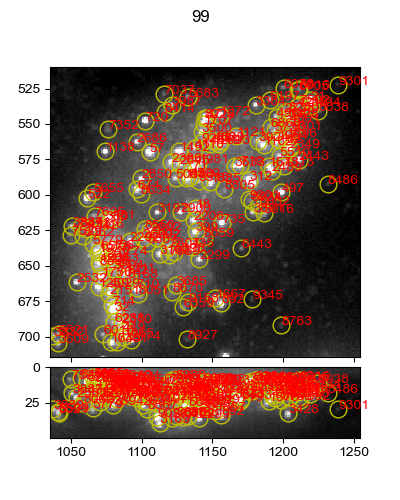

In [19]:
visual_tools.imshow_mark_3d_v2(sel_ims, given_dic=coord_dict, image_names=sel_inds)

In [20]:
_bits = np.array(_ids)[sel_inds]

<IPython.core.display.Javascript object>


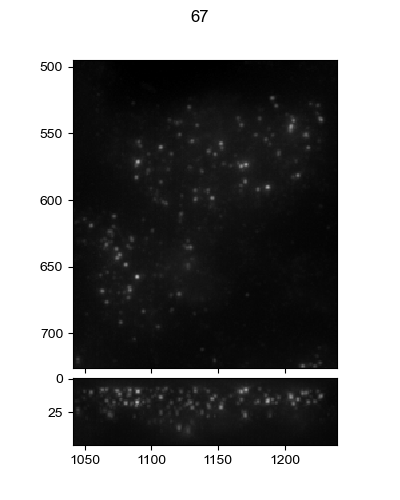

In [29]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im]+list(sel_ims), 
                               image_names=['dapi']+list(_bits), 
                               min_max_default=[2000,15000])